# 1. Company profit prediction

Source: https://youtu.be/NUXdtN1W1FE <br>
Dataset: https://www.kaggle.com/munagalavijayakumar/profit-prediction

## a. Import the libraries

In [1]:
import pandas as pd       # Read csv file
import numpy as np        # ML model requires np arrays

import matplotlib.pyplot as plt     # Seaborn requires matplotlib
import seaborn as sns               # Data visualization

In [2]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

## b. Import the dataset

In [3]:
df = pd.read_csv('./data/1000_Companies.csv')
print(f'\nNumber of rows and columns in the data set: {df.shape}\n')

df.head()


Number of rows and columns in the data set: (1000, 5)



,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## c. Visualize data

In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [5]:
# Check for missing value
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## d. Perform data pre-processing

In [6]:
X = df.iloc[:,:-1].values    # X is all columns before the last column
y = df.iloc[:, -1].values    # Y is the last column

print(f'x = {X[:5]}')    # Show first 5 elements of x
print(f'y = {y[:5]}')    # Show first 5 elements of y

x = [[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']]
y = [192261.83 191792.06 191050.39 182901.99 166187.94]


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X_preprocessor = ColumnTransformer(
    remainder='passthrough',
    transformers=[
        ('categorical', OneHotEncoder(drop='first'), [3])
    ]
)

In [8]:
X_encoded = np.array(X_preprocessor.fit_transform(X))
display(X_encoded[:5, :])

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=2)

## e. Select the best model

In [10]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

CV = []
R2_train = []
R2_test = []

def pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.99
Test R2-score : 1.0
Train CV scores : [0.9950286  0.98371492 0.93799536 0.99120805 0.9207291 ]
Train CV mean : 0.97


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


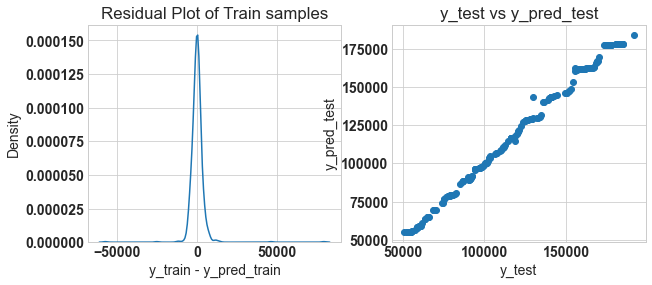

In [12]:
pred_model(rf_rs,'random_forest.pkl')

In [13]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=4, min_samples_split=8, n_estimators=900)


## f. Build the model

In [16]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(max_depth=4, min_samples_split=8, n_estimators=900)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, min_samples_split=8, n_estimators=900)

## g. Evaluate the model

In [17]:
train_accuracy = regressor.score(X_train, y_train)
test_accuracy = regressor.score(X_test, y_test)

print(f"Train accuracy = {round(train_accuracy,3) * 100}%")
print(f"Test accuracy = {round(test_accuracy,3) * 100}%")

Train accuracy = 98.7%
Test accuracy = 99.6%


## h. Predict

In [18]:
data = [
    [200000.0, 200000.0, 200000.0, 'New York'],
    [600000.0, 0.0, 0.0, 'California'],
    [0.0, 600000.0, 0.0, 'Florida'],
    [0.0, 0.0, 600000.0, 'New York']
]

In [19]:
data_processed = X_preprocessor.transform(data)
y_pred = regressor.predict(data_processed)

display(y_pred)

array([330266.17978382, 178003.19635649,  40187.44031482,  48255.40595724])

# 2. Old Car Selling Price

Dataset: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

## a. Import the libraries

In [20]:
import pandas as pd       # Read csv file
import numpy as np        # ML model requires np arrays

import matplotlib.pyplot as plt     # Seaborn requires matplotlib
import seaborn as sns               # Data visualization

In [21]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

## b. Import the dataset

In [22]:
df = pd.read_csv('./data/car data.csv')
print(f'\nNumber of rows and columns in the data set: {df.shape}\n')

df.head()


Number of rows and columns in the data set: (301, 9)



,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## c. Visualize data

In [23]:
df['Car_age'] = 2018 - df['Year']
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,4.372093
std,2.891554,5.082812,8.644115,38886.883882,0.247915,2.891554
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,2.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,4.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,6.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,15.000000


In [24]:
# Check for missing value
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Car_age          0
dtype: int64

In [25]:
# Remove unnecessary features
df.drop(['Car_Name','Year'], axis = 1, inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,4
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,5
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,1
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,7
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,4


## d. Perform data pre-processing

In [26]:
X = df.drop('Selling_Price', axis=1).values    # X is all columns before the last column
y = df.iloc[:, 2].values    # Y is the last column

print(f'x = {X[:5]}')    # Show first 5 elements of x
print(f'y = {y[:5]}')    # Show first 5 elements of y

x = [[5.59 27000 'Petrol' 'Dealer' 'Manual' 0 4]
 [9.54 43000 'Diesel' 'Dealer' 'Manual' 0 5]
 [9.85 6900 'Petrol' 'Dealer' 'Manual' 0 1]
 [4.15 5200 'Petrol' 'Dealer' 'Manual' 0 7]
 [6.87 42450 'Diesel' 'Dealer' 'Manual' 0 4]]
y = [27000 43000  6900  5200 42450]


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X_preprocessor = ColumnTransformer(
    remainder='passthrough',
    transformers=[
        ('categorical', OneHotEncoder(drop='first'), [2, 3, 4, 5])
    ]
)

In [28]:
X_encoded = np.array(X_preprocessor.fit_transform(X))
display(X_encoded[:5, :])

array([[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 5.59, 27000, 4],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 9.54, 43000, 5],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 9.85, 6900, 1],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 4.15, 5200, 7],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 6.87, 42450, 4]], dtype=object)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=25)

## e. Select the best model

In [30]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

CV = []
R2_train = []
R2_test = []

def pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.95
Test R2-score : 0.98
Train CV scores : [0.51897033 0.85784555 0.99685328 0.99944025 0.98743141]
Train CV mean : 0.87


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


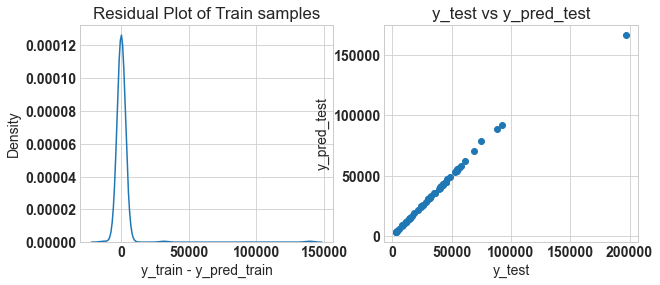

In [32]:
pred_model(rf_rs,'random_forest.pkl')

In [33]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=8, min_samples_split=4, n_estimators=700)


## f. Build the model

In [34]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(max_depth=8, min_samples_split=4, n_estimators=700)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_split=4, n_estimators=700)

## g. Evaluate the model

In [35]:
train_accuracy = regressor.score(X_train, y_train)
test_accuracy = regressor.score(X_test, y_test)

print(f"Train accuracy = {round(train_accuracy,3) * 100}%")
print(f"Test accuracy = {round(test_accuracy,3) * 100}%")

Train accuracy = 95.0%
Test accuracy = 98.2%


# 3. Insurance expense

Dataset: https://www.kaggle.com/awaiskaggler/insurance-csv

## a. Import the libraries

In [36]:
import pandas as pd       # Read csv file
import numpy as np        # ML model requires np arrays

import matplotlib.pyplot as plt     # Seaborn requires matplotlib
import seaborn as sns               # Data visualization

In [37]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

## b. Import the dataset

In [38]:
df = pd.read_csv('./data/insurance.csv')
print(f'\nNumber of rows and columns in the data set: {df.shape}\n')

df.head()


Number of rows and columns in the data set: (1338, 7)



,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## c. Visualize data

In [39]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [40]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

## d. Perform data pre-processing

In [41]:
X = df.iloc[:,:-1].values    # X is all columns before the last column
y = df.iloc[:, -1].values    # Y is the last column

print(f'x = {X[:5]}')    # Show first 5 elements of x
print(f'y = {y[:5]}')    # Show first 5 elements of y

x = [[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.8 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 [33 'male' 22.7 0 'no' 'northwest']
 [32 'male' 28.9 0 'no' 'northwest']]
y = [16884.92  1725.55  4449.46 21984.47  3866.86]


In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X_preprocessor = ColumnTransformer(
    remainder='passthrough',
    transformers=[
        ('categorical', OneHotEncoder(drop='first'), [1, 3, 4, 5])
    ]
)

In [43]:
X_encoded = np.array(X_preprocessor.fit_transform(X))
display(X_encoded[:5, :])

array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 19, 27.9],
       [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 18, 33.8],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 28, 33.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 33, 22.7],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 32, 28.9]],
      dtype=object)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=25)

## e. Select the best model

In [45]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

CV = []
R2_train = []
R2_test = []

def pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.87
Test R2-score : 0.9
Train CV scores : [0.80961818 0.91097034 0.85558191 0.76448117 0.8492458 ]
Train CV mean : 0.84


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


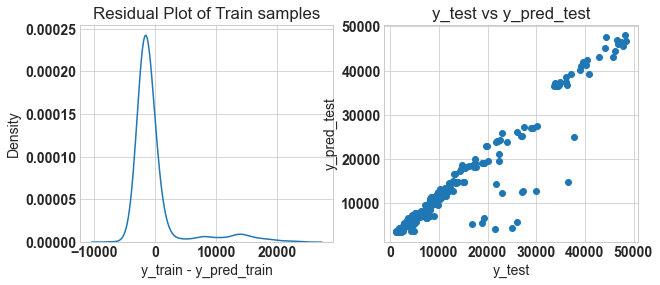

In [47]:
pred_model(rf_rs,'random_forest.pkl')

In [48]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=4, min_samples_leaf=5, min_samples_split=6,
                      n_estimators=900)


## f. Build the model

In [49]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=900)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=5, min_samples_split=6,
                      n_estimators=900)

## g. Evaluate the model

In [50]:
train_accuracy = regressor.score(X_train, y_train)
test_accuracy = regressor.score(X_test, y_test)

print(f"Train accuracy = {round(train_accuracy,4) * 100}%")
print(f"Test accuracy = {round(test_accuracy,4) * 100}%")

Train accuracy = 86.59%
Test accuracy = 89.53%
